In [1]:
import numpy as np
import os
import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD

In [2]:
%load_ext tensorboard

In [3]:
import splitfolders

In [172]:
actions = ['left', 'shoot', 'right', 'nomove']
action_label = {actions:i for i, actions in enumerate(actions)}
IMAGE_SIZE = (224, 224)

In [9]:
action_label

{'left': 0, 'shoot': 1, 'right': 2, 'nomove': 3}

In [5]:
input_folder = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/Game2/Screenshots"

output_folder = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/dataset"

model_path = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model"

In [77]:
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 6619 files [00:15, 429.93 files/s]


In [7]:
def load_dataset():
    
    datasets = [output_folder+"/train", output_folder+"/val"]
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):
            label = action_label[folder]
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                images.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(dataset, folder, file)),cv2.COLOR_BGR2RGB), IMAGE_SIZE) )
                labels.append(label)
        images = np.array(images)
        labels = np.array(labels)
        
        output.append((images, labels))
        
    return output

In [173]:
(train_images, train_labels), (test_images, test_labels) = load_dataset()

Loading C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/dataset/train


100%|███████████████████████████████████████████████████████████████████████████████| 692/692 [00:04<00:00, 171.30it/s]


Loading C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/dataset/val


100%|███████████████████████████████████████████████████████████████████████████████| 173/173 [00:01<00:00, 172.71it/s]


In [80]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [88]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [90]:
def display_random_image(actions, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + actions[labels[index]])
    plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

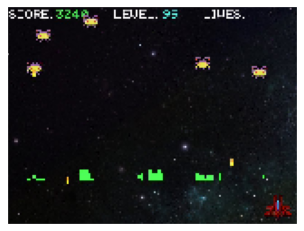

In [91]:
display_random_image(actions, train_images, train_labels)

In [86]:
train_labels = tf.keras.utils.to_categorical(train_labels, 4)

In [87]:
test_labels = tf.keras.utils.to_categorical(test_labels, 4)

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (120, 160, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [102]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 118, 158, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 59, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 57, 77, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 28, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 26, 36, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 18, 32)      

In [104]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
166/166 [==============================] - 34s 205ms/step - loss: 1.2911 - accuracy: 0.3942 - val_loss: 1.2364 - val_accuracy: 0.4370
Epoch 2/50
166/166 [==============================] - 33s 200ms/step - loss: 1.1073 - accuracy: 0.5025 - val_loss: 1.0782 - val_accuracy: 0.5155
Epoch 3/50
166/166 [==============================] - 33s 199ms/step - loss: 0.8763 - accuracy: 0.6273 - val_loss: 0.9917 - val_accuracy: 0.5675
Epoch 4/50
166/166 [==============================] - 33s 200ms/step - loss: 0.6503 - accuracy: 0.7403 - val_loss: 0.9645 - val_accuracy: 0.6030
Epoch 5/50
166/166 [==============================] - 33s 200ms/step - loss: 0.4122 - accuracy: 0.8451 - val_loss: 1.0621 - val_accuracy: 0.6204
Epoch 6/50
166/166 [==============================] - 33s 200ms/step - loss: 0.2249 - accuracy: 0.9169 - val_loss: 1.2240 - val_accuracy: 0.6362
Epoch 7/50
166/166 [==============================] - 33s 200ms/step - loss: 0.1254 - accuracy: 0.9575 - val_loss: 1.5541 - val_ac

In [105]:
model.save(model_path + "/simplemodel/")

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/simplemodel/assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/simplemodel/assets


In [106]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

42/42 [==============================] - 2s 40ms/step


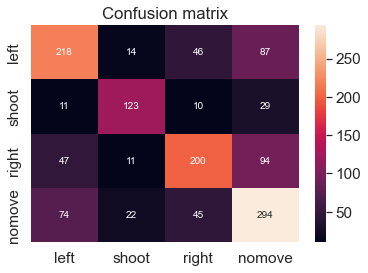

In [107]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in test_labels], pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

In [112]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (120, 160, 3), padding= 'valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding= 'valid'),
    tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.ZeroPadding2D(padding=(2, 2)),
    tf.keras.layers.Conv2D(256, (5, 5), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding = 'valid'),
    tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.ZeroPadding2D(padding=(1, 1)),
    tf.keras.layers.Conv2D(384, (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.ZeroPadding2D(padding=(1, 1)),
    tf.keras.layers.Conv2D(384, (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.ZeroPadding2D(padding=(1, 1)),
    tf.keras.layers.Conv2D(256, (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    #tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding = 'valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.5),
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    
    tf.keras.layers.Dropout(rate = 0.5),
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    
    tf.keras.layers.Dense(1000, activation = 'relu'),
    
    tf.keras.layers.Dense(4, activation = 'softmax')
    
])

In [114]:
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 38, 96)        34944     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 18, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 13, 18, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 18, 256)       614656    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 8, 256)        0         
 g2D)                                                            
                                                      

In [116]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
166/166 [==============================] - 67s 402ms/step - loss: 1.3811 - accuracy: 0.2988 - val_loss: 1.3512 - val_accuracy: 0.2755
Epoch 2/50
166/166 [==============================] - 66s 400ms/step - loss: 1.3586 - accuracy: 0.3151 - val_loss: 1.3417 - val_accuracy: 0.3291
Epoch 3/50
166/166 [==============================] - 66s 400ms/step - loss: 1.3478 - accuracy: 0.3306 - val_loss: 1.3373 - val_accuracy: 0.3509
Epoch 4/50
166/166 [==============================] - 67s 402ms/step - loss: 1.3457 - accuracy: 0.3283 - val_loss: 1.3257 - val_accuracy: 0.3638
Epoch 5/50
166/166 [==============================] - 66s 400ms/step - loss: 1.3344 - accuracy: 0.3451 - val_loss: 1.3206 - val_accuracy: 0.3751
Epoch 6/50
166/166 [==============================] - 67s 401ms/step - loss: 1.3313 - accuracy: 0.3485 - val_loss: 1.3187 - val_accuracy: 0.3706
Epoch 7/50
166/166 [==============================] - 68s 407ms/step - loss: 1.3283 - accuracy: 0.3578 - val_loss: 1.3156 - val_ac

In [117]:
model.save(model_path + "/AlexNetNormalized/")

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNetNormalized/assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNetNormalized/assets


In [118]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

42/42 [==============================] - 3s 65ms/step


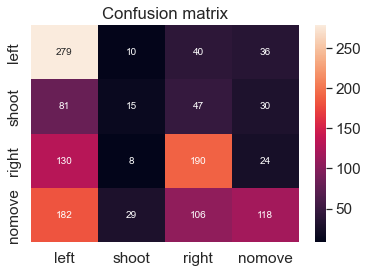

In [119]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in test_labels], pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (120, 160, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    tf.keras.layers.Conv2D(256, (5, 5), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    tf.keras.layers.Conv2D(384, (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    
    tf.keras.layers.Conv2D(384, (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    
    tf.keras.layers.Conv2D(256, (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),

    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.5),
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    
    tf.keras.layers.Dropout(rate = 0.5),
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    
    #tf.keras.layers.Dense(1000, activation = 'relu'),
    
    tf.keras.layers.Dense(4, activation = 'softmax')
    
])

In [130]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [134]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 38, 96)        34944     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 18, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 13, 18, 256)       614656    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 6, 8, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 6, 8, 384)         885120    
                                                                 
 conv2d_42 (Conv2D)          (None, 6, 8, 384)        

In [136]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
166/166 [==============================] - 67s 400ms/step - loss: 11175.5996 - accuracy: 0.3138 - val_loss: 1.3413 - val_accuracy: 0.3283
Epoch 2/50
166/166 [==============================] - 67s 407ms/step - loss: 1.3414 - accuracy: 0.3240 - val_loss: 1.3400 - val_accuracy: 0.3283
Epoch 3/50
166/166 [==============================] - 69s 414ms/step - loss: 1.3415 - accuracy: 0.3287 - val_loss: 1.3411 - val_accuracy: 0.3283
Epoch 4/50
166/166 [==============================] - 68s 410ms/step - loss: 1.3402 - accuracy: 0.3287 - val_loss: 1.3390 - val_accuracy: 0.3283
Epoch 5/50
166/166 [==============================] - 66s 395ms/step - loss: 1.3401 - accuracy: 0.3287 - val_loss: 1.3392 - val_accuracy: 0.3283
Epoch 6/50
166/166 [==============================] - 65s 394ms/step - loss: 1.3403 - accuracy: 0.3287 - val_loss: 1.3392 - val_accuracy: 0.3283
Epoch 7/50
166/166 [==============================] - 65s 394ms/step - loss: 1.3401 - accuracy: 0.3287 - val_loss: 1.3390 - va

In [137]:
model.save(model_path + "/AlexNet/")

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNet/assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNet/assets


In [138]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

42/42 [==============================] - 3s 62ms/step


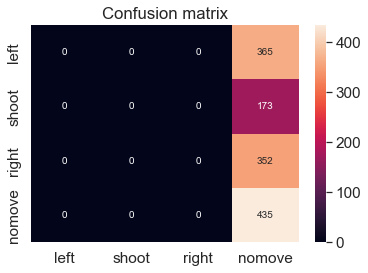

In [139]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in test_labels], pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

In [140]:
class AlexNet(tf.keras.models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [141]:
model = AlexNet((120, 160, 3), 4)

In [142]:
model.summary()

Model: "alex_net_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 28, 38, 96)        34944     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 18, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 18, 256)       614656    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 8, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 6, 8, 384)         885120    
                                                                 
 conv2d_47 (Conv2D)          (None, 6, 8, 384)         1

In [143]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
166/166 [==============================] - 70s 421ms/step - loss: 1.8106 - accuracy: 0.3251 - val_loss: 1.3415 - val_accuracy: 0.3283
Epoch 2/50
166/166 [==============================] - 69s 419ms/step - loss: 1.3406 - accuracy: 0.3247 - val_loss: 1.3444 - val_accuracy: 0.3283
Epoch 3/50
166/166 [==============================] - 70s 420ms/step - loss: 1.3429 - accuracy: 0.3287 - val_loss: 1.3407 - val_accuracy: 0.3283
Epoch 4/50
166/166 [==============================] - 69s 417ms/step - loss: 1.3414 - accuracy: 0.3287 - val_loss: 1.3399 - val_accuracy: 0.3283
Epoch 5/50
166/166 [==============================] - 69s 417ms/step - loss: 1.3411 - accuracy: 0.3287 - val_loss: 1.3397 - val_accuracy: 0.3283
Epoch 6/50
166/166 [==============================] - 69s 419ms/step - loss: 1.3408 - accuracy: 0.3287 - val_loss: 1.3409 - val_accuracy: 0.3283
Epoch 7/50
166/166 [==============================] - 70s 419ms/step - loss: 1.3409 - accuracy: 0.3287 - val_loss: 1.3393 - val_ac

In [144]:
model.save(model_path + "/AlexNet2/")

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNet2/assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNet2/assets


In [145]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

42/42 [==============================] - 3s 65ms/step


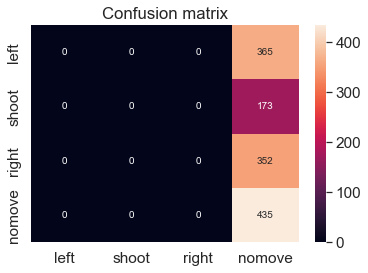

In [146]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in test_labels], pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

In [147]:
class AlexNet(tf.keras.models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [148]:
model = AlexNet((120, 160, 3), 4)

In [149]:
model.summary()

Model: "alex_net_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 38, 96)        34944     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 13, 18, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 13, 18, 256)       614656    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 8, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 6, 8, 384)         885120    
                                                                 
 conv2d_52 (Conv2D)          (None, 6, 8, 384)         1

In [150]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
166/166 [==============================] - 66s 394ms/step - loss: 1.3397 - accuracy: 0.3404 - val_loss: 1.3712 - val_accuracy: 0.3366
Epoch 2/50
166/166 [==============================] - 65s 393ms/step - loss: 1.3121 - accuracy: 0.3733 - val_loss: 1.3163 - val_accuracy: 0.3502
Epoch 3/50
166/166 [==============================] - 65s 393ms/step - loss: 1.2954 - accuracy: 0.3921 - val_loss: 1.3440 - val_accuracy: 0.3592
Epoch 4/50
166/166 [==============================] - 66s 397ms/step - loss: 1.2739 - accuracy: 0.4127 - val_loss: 1.2904 - val_accuracy: 0.3917
Epoch 5/50
166/166 [==============================] - 66s 395ms/step - loss: 1.2510 - accuracy: 0.4414 - val_loss: 1.2825 - val_accuracy: 0.4000
Epoch 6/50
166/166 [==============================] - 66s 395ms/step - loss: 1.2234 - accuracy: 0.4554 - val_loss: 1.4133 - val_accuracy: 0.3683
Epoch 7/50
166/166 [==============================] - 65s 394ms/step - loss: 1.1974 - accuracy: 0.4673 - val_loss: 1.2500 - val_ac

In [151]:
model.save(model_path + "/AlexNet2SGD/")

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNet2SGD/assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/AlexNet2SGD/assets


In [152]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

42/42 [==============================] - 3s 64ms/step


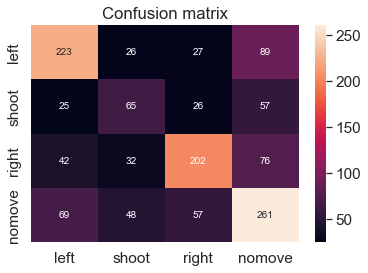

In [153]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in test_labels], pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

In [161]:
class LeNet(tf.keras.models.Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(Flatten())
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                    metrics=['accuracy'], optimizer='SGD')

In [162]:
model = LeNet((120, 160, 3), 4)

In [163]:
model.summary()

Model: "le_net_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 120, 160, 6)       456       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 119, 159, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 115, 155, 16)      2416      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 57, 77, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 53, 73, 120)       48120     
                                                                 
 flatten_13 (Flatten)        (None, 464280)            0  

In [164]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
166/166 [==============================] - 87s 521ms/step - loss: 1.3069 - accuracy: 0.3734 - val_loss: 1.3107 - val_accuracy: 0.3834
Epoch 2/50
166/166 [==============================] - 86s 518ms/step - loss: 1.2108 - accuracy: 0.4511 - val_loss: 1.3073 - val_accuracy: 0.3774
Epoch 3/50
166/166 [==============================] - 87s 523ms/step - loss: 1.1373 - accuracy: 0.5072 - val_loss: 1.2649 - val_accuracy: 0.4302
Epoch 4/50
166/166 [==============================] - 86s 519ms/step - loss: 1.0832 - accuracy: 0.5308 - val_loss: 1.2742 - val_accuracy: 0.4385
Epoch 5/50
166/166 [==============================] - 85s 512ms/step - loss: 1.0228 - accuracy: 0.5684 - val_loss: 1.6370 - val_accuracy: 0.3200
Epoch 6/50
166/166 [==============================] - 84s 507ms/step - loss: 0.9792 - accuracy: 0.5952 - val_loss: 1.2783 - val_accuracy: 0.4649
Epoch 7/50
166/166 [==============================] - 85s 513ms/step - loss: 0.9152 - accuracy: 0.6262 - val_loss: 1.3951 - val_ac

In [165]:
model.save(model_path + "/LeNetSGD/")

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/LeNetSGD/assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model/LeNetSGD/assets


In [166]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

42/42 [==============================] - 4s 90ms/step


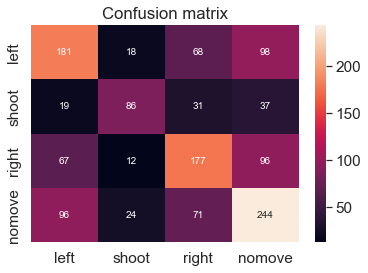

In [167]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in test_labels], pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

In [168]:
class LeNet(tf.keras.models.Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(Flatten())
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                    metrics=['accuracy'], optimizer='Adam')

In [169]:
model = LeNet((120, 160, 3), 4)

In [170]:
model.summary()

Model: "le_net_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 120, 160, 6)       456       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 119, 159, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 115, 155, 16)      2416      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 57, 77, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 53, 73, 120)       48120     
                                                                 
 flatten_14 (Flatten)        (None, 464280)            0  

In [171]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
166/166 [==============================] - 92s 551ms/step - loss: 2.2707 - accuracy: 0.3098 - val_loss: 1.3439 - val_accuracy: 0.3283
Epoch 2/50
166/166 [==============================] - 91s 549ms/step - loss: 1.3429 - accuracy: 0.3104 - val_loss: 1.3408 - val_accuracy: 0.3283
Epoch 3/50
166/166 [==============================] - 91s 549ms/step - loss: 1.3415 - accuracy: 0.3207 - val_loss: 1.3390 - val_accuracy: 0.3283
Epoch 4/50
166/166 [==============================] - 91s 548ms/step - loss: 1.3447 - accuracy: 0.3138 - val_loss: 1.3420 - val_accuracy: 0.3283
Epoch 5/50
166/166 [==============================] - 92s 552ms/step - loss: 1.3429 - accuracy: 0.3230 - val_loss: 1.3460 - val_accuracy: 0.3283
Epoch 6/50
166/166 [==============================] - 91s 550ms/step - loss: 1.3453 - accuracy: 0.3062 - val_loss: 1.3466 - val_accuracy: 0.3283
Epoch 7/50
166/166 [==============================] - 91s 549ms/step - loss: 1.3453 - accuracy: 0.3168 - val_loss: 1.3445 - val_ac

KeyboardInterrupt: 

In [ ]:
model.save(model_path + "/LeNetAdam/")

In [ ]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

In [ ]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in test_labels], pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()

In [25]:
log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

In [26]:
action_label

{'left': 0, 'shoot': 1, 'right': 2, 'nomove': 3}

In [27]:
train_images.shape

(3314, 120, 160, 3)

In [28]:
test_images.shape

(831, 120, 160, 3)

In [31]:
test_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [47]:
model.save(model_path)

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model\assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model\assets


In [49]:
pred

array([[9.6935534e-01, 9.9169128e-10, 3.0644739e-02, 1.4025111e-08],
       [5.1829398e-01, 2.2245106e-10, 1.2747785e-01, 3.5422817e-01],
       [9.9904007e-01, 1.8878474e-09, 7.6059514e-05, 8.8382035e-04],
       ...,
       [1.9724912e-03, 4.6644395e-06, 6.8675783e-03, 9.9115527e-01],
       [2.9423213e-01, 6.9029552e-01, 1.5458516e-02, 1.3803684e-05],
       [2.3125185e-05, 9.9990928e-01, 6.7262226e-05, 3.0000933e-07]],
      dtype=float32)

In [99]:
pred_labels = np.argmax(pred, axis=1)


(1325,)

In [56]:
tf.keras.utils.plot_model(model, to_file='complex_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [57]:
train_labels.shape

(1881, 4)

In [58]:
print(len(np.unique(pred)))

6


In [54]:
pred_labels

array([0, 0, 0, 0, 3, 2, 2, 0, 3, 0, 3, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 2, 2, 0, 2, 0, 2, 0, 3,
       2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 3, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       3, 0, 0, 0, 3, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0,
       3, 2, 2, 0, 2, 0, 0, 0, 0, 2, 3, 0, 3, 1, 0, 2, 0, 0, 3, 2, 0, 0,
       0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 3,
       0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 3, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 3, 3, 0, 2, 0, 1, 0, 0, 0,
       3, 0, 3, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3,
       3, 3, 0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 2, 2, 3, 0, 0, 3, 3,
       1, 3, 3, 0, 3, 3, 0, 3, 2, 0, 0, 3, 2, 3, 3,

In [59]:
print(np.histogram(pred_labels, bins=[0, 1, 2, 3, 4]))

(array([282,  84, 261, 204], dtype=int64), array([0, 1, 2, 3, 4]))


In [70]:
pred_labels

array([0, 0, 0, 0, 3, 2, 2, 0, 3, 0, 3, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 2, 2, 0, 2, 0, 2, 0, 3,
       2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 3, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       3, 0, 0, 0, 3, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0,
       3, 2, 2, 0, 2, 0, 0, 0, 0, 2, 3, 0, 3, 1, 0, 2, 0, 0, 3, 2, 0, 0,
       0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 3,
       0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 3, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 3, 3, 0, 2, 0, 1, 0, 0, 0,
       3, 0, 3, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3,
       3, 3, 0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 2, 2, 3, 0, 0, 3, 3,
       1, 3, 3, 0, 3, 3, 0, 3, 2, 0, 0, 3, 2, 3, 3,

In [71]:
print([np.argmax(y, axis=None, out=None) for y in test_labels])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [63]:
test_labels.shape

(344, 3)

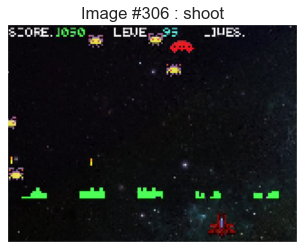

In [85]:
display_random_image(actions, test_images, pred_labels)

In [65]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [66]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

11/11 [==============================] - 7s 637ms/step


In [67]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [68]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X)
C1 = C[:,0]
C2 = C[:,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

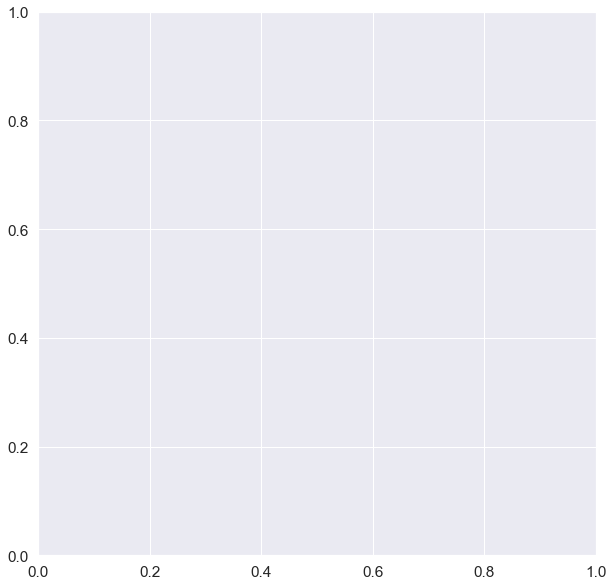

In [69]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(actions):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [48]:
array = np.reshape(cv2.resize(cv2.cvtColor(cv2.imread(output_folder+"/train/left/screenshotAJKWU.jpg"),cv2.COLOR_BGR2RGB), IMAGE_SIZE), [1,120,160,3])

array.shape

(1, 120, 160, 3)

In [49]:
pred = model.predict(array)

1/1 [==============================] - 0s 125ms/step


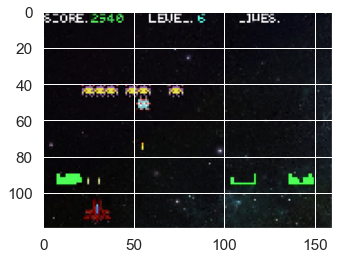

In [67]:
plt.imshow(train_images[0])

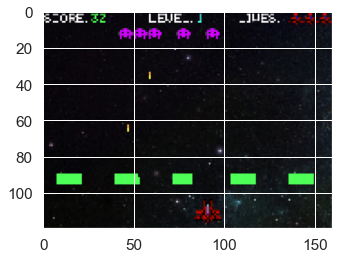

In [68]:
array1 = np.load("C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/file1.txt.npy")
plt.imshow(array1)